# K.MANI VARUN
# 2211CS010291

# printing the spark version

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

# creating data frame vegetable


In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count,avg,countDistinct,expr,stddev
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName("vegetable").getOrCreate()

# loading dataset mandi.csv

In [18]:
df = spark.read.csv("mandi.csv", header=True, inferSchema=True)

In [19]:
#summARY

In [20]:
df.describe().show()

+-------+--------------+----------+--------------+------------+----------------+-----+------------+-----------------+-----------------+-----------------+
|summary|         State|  District|        Market|   Commodity|         Variety|Grade|Arrival_Date|  Min_x0020_Price|  Max_x0020_Price|Modal_x0020_Price|
+-------+--------------+----------+--------------+------------+----------------+-----+------------+-----------------+-----------------+-----------------+
|  count|          1370|      1370|          1370|        1370|            1370| 1370|        1370|             1370|             1370|             1370|
|   mean|          NULL|      NULL|          NULL|        NULL|          1060.0| NULL|        NULL|3417.278102189781|4045.943795620438|3763.865693430657|
| stddev|          NULL|      NULL|          NULL|        NULL|86.2670273047588| NULL|        NULL|3456.502056318581|4093.656369064894|3692.547242622293|
|    min|Andhra Pradesh|Ahmednagar|         A lot|  Amaranthus|        1009 

In [21]:
print("=== First 10 rows ===")
df.show(10)

=== First 10 rows ===
+----------+----------------+--------------------+--------------------+--------------------+-------+------------+---------------+---------------+-----------------+
|     State|        District|              Market|           Commodity|             Variety|  Grade|Arrival_Date|Min_x0020_Price|Max_x0020_Price|Modal_x0020_Price|
+----------+----------------+--------------------+--------------------+--------------------+-------+------------+---------------+---------------+-----------------+
|Chandigarh|      Chandigarh|Chandigarh(Grain/...|         Cauliflower|         Cauliflower|    FAQ|  30/09/2025|           3000|           5000|             4000|
|Chandigarh|      Chandigarh|Chandigarh(Grain/...|       Ginger(Green)|               Other|    FAQ|  30/09/2025|           2000|           3500|             2800|
|Chandigarh|      Chandigarh|Chandigarh(Grain/...|            Peas Wet|               Other|    FAQ|  30/09/2025|           5000|          10000|             

# What is the total number of records in the dataset

In [22]:
total_records = df.count()
print("Total number of records:", total_records)

Total number of records: 1370


# Which states/regions have the highest and lowest number of mandi entries?

In [23]:
state_counts = df.groupBy("State").agg(count("*").alias("entry_count"))

highest_state = state_counts.orderBy(col("entry_count").desc()).limit(1)
highest_state.show()

lowest_state = state_counts.orderBy(col("entry_count").asc()).limit(1)
lowest_state.show()

+------+-----------+
| State|entry_count|
+------+-----------+
|Kerala|        279|
+------+-----------+

+--------------+-----------+
|         State|entry_count|
+--------------+-----------+
|Andhra Pradesh|          1|
+--------------+-----------+



#  the average price/value across all states?

In [24]:

avg_price = df.select(avg("Modal_x0020_Price").alias("average_price"))
avg_price.show()


+-----------------+
|    average_price|
+-----------------+
|3763.865693430657|
+-----------------+



# Which state has the maximum average price?

In [25]:

df.groupBy("State") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy(col("avg_price").desc()) \
  .limit(1) \
  .show()

+--------+-----------------+
|   State|        avg_price|
+--------+-----------------+
|Nagaland|7305.882352941177|
+--------+-----------------+



# Which state has the minimum average price?

In [26]:
df.groupBy("State") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy(col("avg_price").asc()) \
  .limit(1) \
  .show()

+-----+---------+
|State|avg_price|
+-----+---------+
|Bihar|   2300.0|
+-----+---------+



# What are the top 5 commodities with the highest average price?

In [32]:
top5_df=df.groupBy("Commodity") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy(col("avg_price").desc()) \
  .limit(5) \
  .show()

+--------------------+---------+
|           Commodity|avg_price|
+--------------------+---------+
|        Black pepper|  52000.0|
|Arecanut(Betelnut...|  48954.0|
|         Coconut Oil|  39000.0|
|  Cummin Seed(Jeera)|  16925.0|
|         Mustard Oil|  15400.0|
+--------------------+---------+



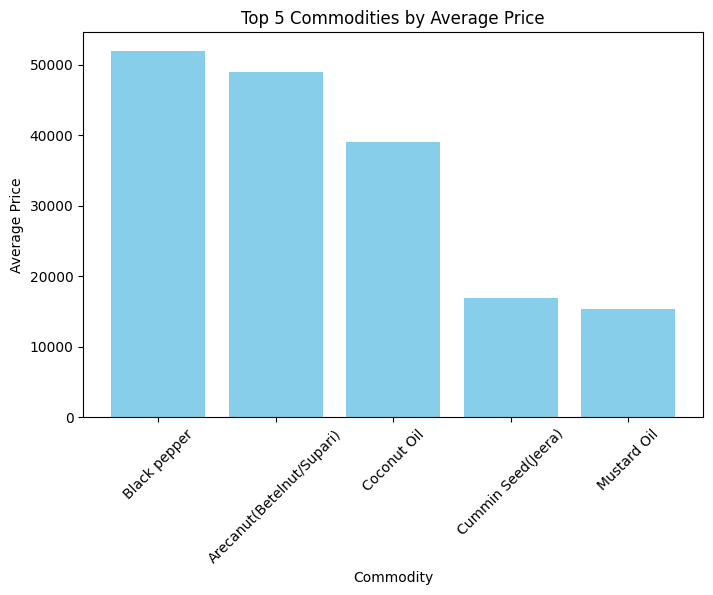

In [35]:
top5_df = df.groupBy("Commodity") \
    .agg(avg("Modal_x0020_Price").alias("avg_price")) \
    .orderBy(col("avg_price").desc()) \
    .limit(5)

top5_pd = top5_df.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(top5_pd["Commodity"], top5_pd["avg_price"], color="skyblue")
plt.xlabel("Commodity")
plt.ylabel("Average Price")
plt.title("Top 5 Commodities by Average Price")
plt.xticks(rotation=45)
plt.show()

# What are the bottom 5 commodities with the lowest average price

In [36]:
df.groupBy("Commodity") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy(col("avg_price").asc()) \
  .limit(5) \
  .show()

+-------------+---------+
|    Commodity|avg_price|
+-------------+---------+
| Mint(Pudina)|      5.0|
|       Rajgir|     10.0|
|  Onion Green|     15.0|
|Methi(Leaves)|     15.0|
|     Firewood|    320.0|
+-------------+---------+



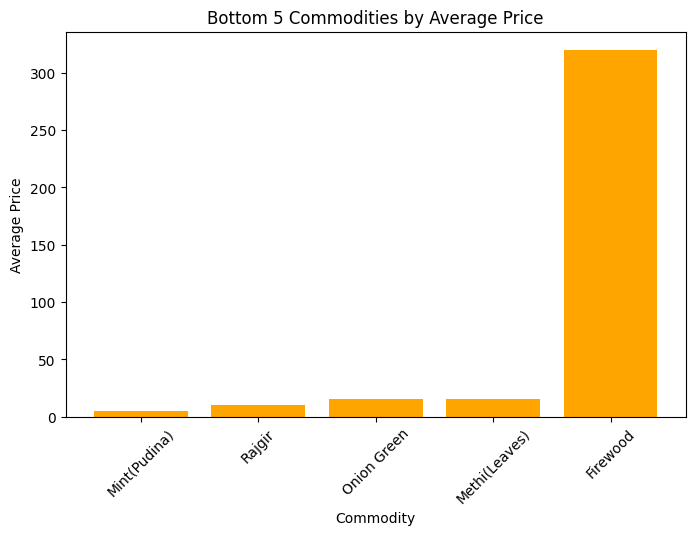

In [57]:
bottom5_pd = bottom5_df.toPandas()
plt.figure(figsize=(8, 5))
plt.bar(bottom5_pd["Commodity"], bottom5_pd["avg_price"], color="orange")
plt.xlabel("Commodity")
plt.ylabel("Average Price")
plt.title("Bottom 5 Commodities by Average Price")
plt.xticks(rotation=45)
plt.show()

# Which state has the maximum number of unique commodities

In [38]:
df.groupBy("State") \
  .agg(countDistinct("Commodity").alias("unique_commodities")) \
  .orderBy(col("unique_commodities").desc()) \
  .limit(1) \
  .show()

+------+------------------+
| State|unique_commodities|
+------+------------------+
|Kerala|                56|
+------+------------------+



# Which commodity is most frequently listed in the dataset

In [39]:
df.groupBy("Commodity") \
  .agg(count("*").alias("entry_count")) \
  .orderBy(col("entry_count").desc()) \
  .limit(1) \
  .show()

+---------+-----------+
|Commodity|entry_count|
+---------+-----------+
|   Potato|         79|
+---------+-----------+



# What is the trend of average prices over time (if date column is present)

In [40]:
df = df.withColumn("Arrival_Date", expr("try_to_timestamp(Arrival_Date, 'dd/MM/yyyy')"))
df.filter(col("Arrival_Date").isNotNull()) \
  .groupBy("Arrival_Date") \
  .agg(avg("Modal_x0020_Price").alias("avg_price")) \
  .orderBy("Arrival_Date") \
  .show()

+-------------------+-----------------+
|       Arrival_Date|        avg_price|
+-------------------+-----------------+
|2025-09-30 00:00:00|3763.865693430657|
+-------------------+-----------------+



# Which state shows the highest variation (std. deviation) in prices

In [41]:
df.groupBy("State") \
  .agg(stddev("Modal_x0020_Price").alias("price_stddev")) \
  .orderBy(col("price_stddev").desc()) \
  .limit(1) \
  .show()

+---------+-----------------+
|    State|     price_stddev|
+---------+-----------------+
|Karnataka|9756.140969746413|
+---------+-----------------+



# Which commodity has the most stable (least varying) price across markets

In [42]:
df_clean = df.withColumn("price_double", col("Modal_x0020_Price").cast("double")) \
             .filter(col("price_double").isNotNull())

df_clean.groupBy("Commodity") \
        .agg(stddev("price_double").alias("price_stddev")) \
        .orderBy(col("price_stddev").asc()) \
        .limit(1) \
        .show()

+---------+------------+
|Commodity|price_stddev|
+---------+------------+
|Thondekai|        NULL|
+---------+------------+



# What is the  mandi count per state

In [55]:
state_df = df.groupBy("State") \
    .agg(count("*").alias("mandi_count")) \
    .orderBy(col("mandi_count").desc())

state_df.show()

+-----------------+-----------+
|            State|mandi_count|
+-----------------+-----------+
|           Kerala|        279|
|    Uttar Pradesh|        244|
| Himachal Pradesh|        179|
|           Punjab|        111|
|          Haryana|         97|
|      Maharashtra|         91|
|   Madhya Pradesh|         83|
|          Gujarat|         61|
|        Karnataka|         44|
|      West Bengal|         39|
|        Rajasthan|         38|
|Jammu and Kashmir|         33|
|           Odisha|         24|
|         Nagaland|         17|
|       Chandigarh|         14|
|       Uttrakhand|          8|
|        Telangana|          5|
|            Bihar|          2|
|   Andhra Pradesh|          1|
+-----------------+-----------+



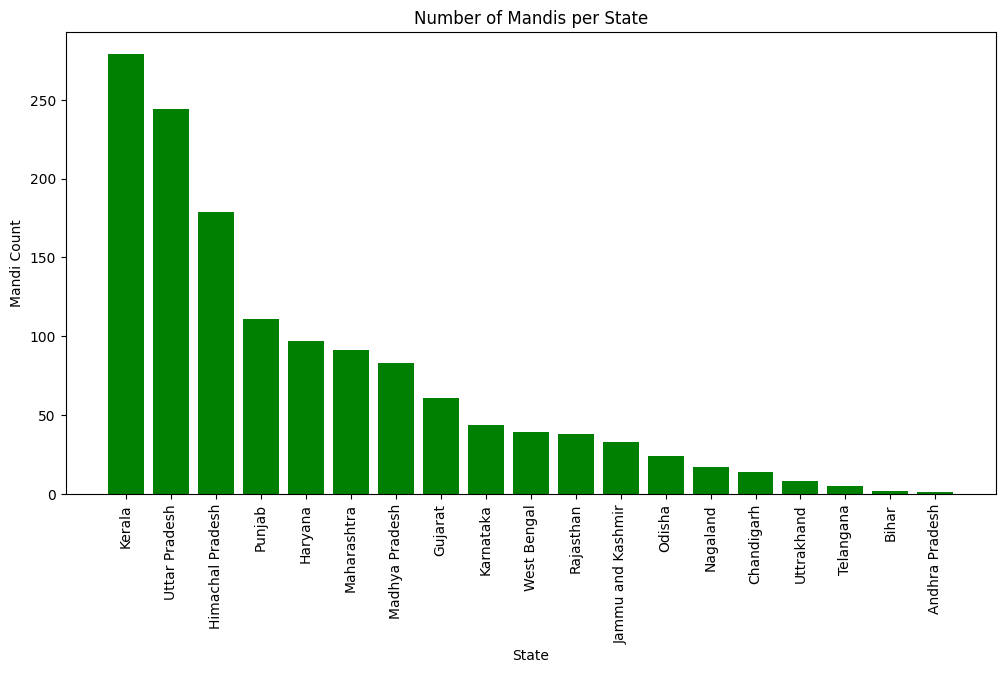

In [56]:
state_pd = state_df.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(state_pd["State"], state_pd["mandi_count"], color="green")
plt.xlabel("State")
plt.ylabel("Mandi Count")
plt.title("Number of Mandis per State")
plt.xticks(rotation=90)
plt.show()

# How many missing/invalid entries are there in price or commodity columns

In [58]:

df.filter(col("Modal_x0020_Price").isNull() | col("Commodity").isNull()).count()


0

# Which state + commodity combination has the highest recorded price?


In [59]:
df.withColumn("price_double", col("Modal_x0020_Price").cast("double")) \
  .filter(col("price_double").isNotNull()) \
  .orderBy(col("price_double").desc()) \
  .select("State", "Commodity", "price_double") \
  .limit(1) \
  .show()

+------+------------+------------+
| State|   Commodity|price_double|
+------+------------+------------+
|Kerala|Black pepper|     65000.0|
+------+------------+------------+

